In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("pharmacy_otc_sales_data.csv")
df.head(15)

,Date,Product,Sales Person,Boxes Shipped,Amount ($),Country
0,06-02-2022,Pain Relief Tablets,Divya Mehra,7,67.43,Australia
1,05-02-2022,Antiseptic Cream,Nikhil Batra,18,421.46,Canada
2,19-02-2022,Cough Syrup,Ritika Shah,2,48.25,UK
3,28-03-2022,Pain Relief Tablets,Nikhil Batra,5,59.89,UK
4,17-01-2022,Digestive Enzyme,Ritika Shah,8,147.73,USA
5,09-02-2022,Digestive Enzyme,Ritika Shah,18,400.87,USA
6,30-06-2022,Antiseptic Cream,Nikhil Batra,3,50.35,Australia
7,25-07-2022,Eye Drops,Ritika Shah,13,282.43,USA
8,20-03-2022,Nasal Spray,Priya Singh,17,394.01,UK
9,24-01-2022,Antiseptic Cream,Sneha Iyer,7,89.29,Australia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           333 non-null    object 
 1   Product        333 non-null    object 
 2   Sales Person   333 non-null    object 
 3   Boxes Shipped  333 non-null    int64  
 4   Amount ($)     333 non-null    float64
 5   Country        333 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.7+ KB


In [5]:
df.describe()

,Boxes Shipped,Amount ($)
count,333.000000,333.000000
mean,10.474474,176.964835
std,5.955415,119.058556
min,1.000000,8.090000
25%,5.000000,75.990000
50%,11.000000,156.920000
75%,16.000000,248.770000
max,20.000000,494.080000


In [6]:
df.isnull().sum()

Date             0
Product          0
Sales Person     0
Boxes Shipped    0
Amount ($)       0
Country          0
dtype: int64

In [8]:
df['Tax'] = df['Amount ($)']*(18/100)
df.head(15)

,Date,Product,Sales Person,Boxes Shipped,Amount ($),Country,Tax
0,06-02-2022,Pain Relief Tablets,Divya Mehra,7,67.43,Australia,12.1374
1,05-02-2022,Antiseptic Cream,Nikhil Batra,18,421.46,Canada,75.8628
2,19-02-2022,Cough Syrup,Ritika Shah,2,48.25,UK,8.6850
3,28-03-2022,Pain Relief Tablets,Nikhil Batra,5,59.89,UK,10.7802
4,17-01-2022,Digestive Enzyme,Ritika Shah,8,147.73,USA,26.5914
5,09-02-2022,Digestive Enzyme,Ritika Shah,18,400.87,USA,72.1566
6,30-06-2022,Antiseptic Cream,Nikhil Batra,3,50.35,Australia,9.0630
7,25-07-2022,Eye Drops,Ritika Shah,13,282.43,USA,50.8374
8,20-03-2022,Nasal Spray,Priya Singh,17,394.01,UK,70.9218
9,24-01-2022,Antiseptic Cream,Sneha Iyer,7,89.29,Australia,16.0722


In [9]:
# Group salespersons and list unique products
import pandas as pd

df = pd.read_csv("pharmacy_otc_sales_data.csv")
sales_products = df.groupby("Sales Person")["Product"].unique()

# Display first 15 rows
print(sales_products.head(15))


Sales Person
Aman Verma      [Eye Drops, Allergy Pills, Digestive Enzyme, C...
Divya Mehra     [Pain Relief Tablets, Cough Syrup, Allergy Pil...
Nikhil Batra    [Antiseptic Cream, Pain Relief Tablets, Cough ...
Priya Singh     [Nasal Spray, Eye Drops, Antiseptic Cream, Cou...
Rajesh Patel    [Allergy Pills, Pain Relief Tablets, Antisepti...
Ritika Shah     [Cough Syrup, Digestive Enzyme, Eye Drops, Pai...
Sneha Iyer      [Antiseptic Cream, Eye Drops, Digestive Enzyme...
Name: Product, dtype: object


In [10]:
#product Size
count = df.groupby("Product").size()
print(count)

Product
Allergy Pills          50
Antiseptic Cream       56
Cough Syrup            41
Digestive Enzyme       51
Eye Drops              49
Nasal Spray            47
Pain Relief Tablets    39
dtype: int64


In [11]:
#countries size
count = df.groupby("Country").size()
print(count)

Country
Australia    53
Canada       65
India        64
UK           74
USA          77
dtype: int64


In [12]:
#Top Sales person
top_sales = df.groupby("Sales Person")["Amount ($)"].sum().sort_values(ascending=False)
print (top_sales)

Sales Person
Rajesh Patel    11023.53
Nikhil Batra    10416.34
Priya Singh      9121.78
Ritika Shah      7945.97
Aman Verma       7039.07
Divya Mehra      6896.15
Sneha Iyer       6486.45
Name: Amount ($), dtype: float64


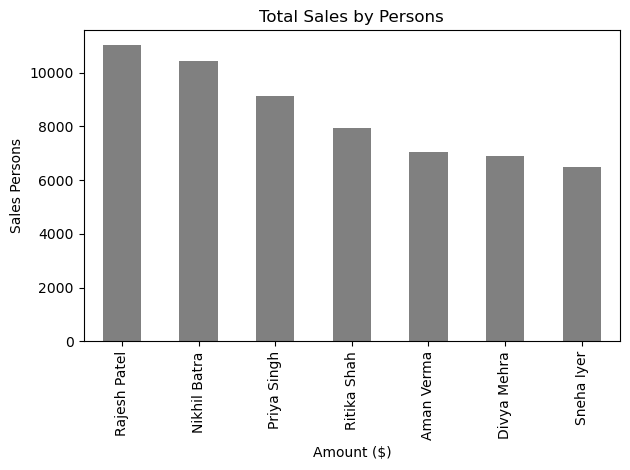

In [13]:
#Top Sales person
import matplotlib.pyplot as plt
top_sales = df.groupby("Sales Person")["Amount ($)"].sum().sort_values(ascending=False)
top_sales.plot(kind='bar', color='grey')
plt.title("Total Sales by Persons")
plt.xlabel("Amount ($)")
plt.ylabel("Sales Persons")
plt.tight_layout()
plt.show()

In [14]:
#average products 
Average_Product = df.groupby("Product")["Amount ($)"].mean()
print(Average_Product)

Product
Allergy Pills          155.651600
Antiseptic Cream       173.862143
Cough Syrup            193.097805
Digestive Enzyme       216.796275
Eye Drops              164.007347
Nasal Spray            178.880000
Pain Relief Tablets    153.668974
Name: Amount ($), dtype: float64


In [15]:
#average products 
product_sales = df.groupby("Product")["Amount ($)"].sum().sort_values( ascending = False)
print (product_sales)

Product
Digestive Enzyme       11056.61
Antiseptic Cream        9736.28
Nasal Spray             8407.36
Eye Drops               8036.36
Cough Syrup             7917.01
Allergy Pills           7782.58
Pain Relief Tablets     5993.09
Name: Amount ($), dtype: float64


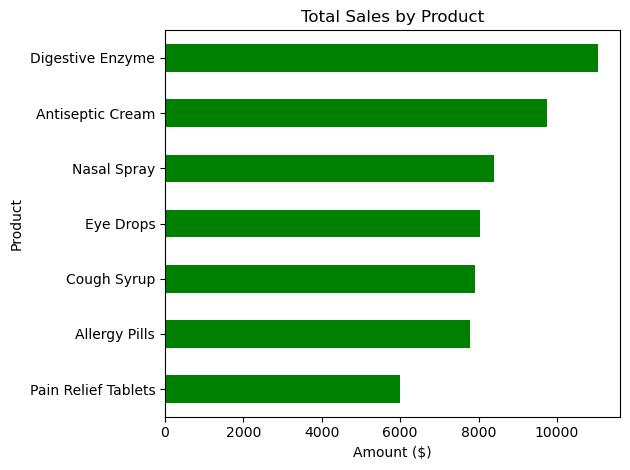

In [16]:
#Total Sales by Product
product_sales = df.groupby("Product")["Amount ($)"].sum().sort_values()
product_sales.plot(kind='barh', color='green')
plt.title("Total Sales by Product")
plt.xlabel("Amount ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [24]:
#Sales Over Time

df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df_monthly = df.set_index("Date").resample("ME")["Amount ($)"].sum()
print (df_monthly)

Date
2022-01-31    5536.39
2022-02-28    7451.50
2022-03-31    7062.15
2022-04-30    7339.15
2022-05-31    8885.00
2022-06-30    7019.56
2022-07-31    8754.44
2022-08-31    6881.10
Freq: ME, Name: Amount ($), dtype: float64


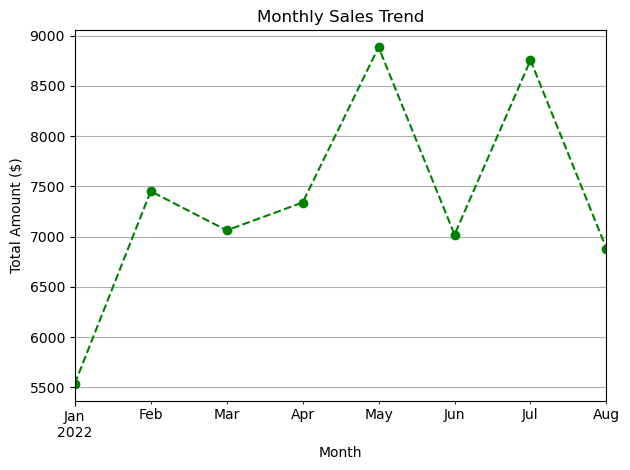

In [25]:
#Monthly Report
df_monthly.plot(marker='o', linestyle='--', color='green')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Amount ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x18fa6ed0910>,
 [Text(0.9798714933954947, 0.49985183447786125, '50'),
  Text(0.1087869785178583, 1.0946074151516403, '56'),
  Text(-0.8012968851257514, 0.7536068616246595, '41'),
  Text(-1.0929583827390592, -0.12426573783799018, '51'),
  Text(-0.5409882409738253, -0.957774359193253, '49'),
  Text(0.41975374156760004, -1.0167629007984116, '47'),
  Text(1.0263798661185026, -0.3956568847202899, '39')])

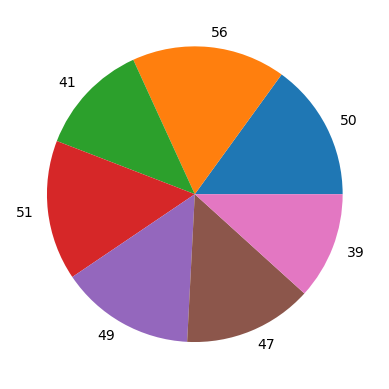

In [26]:
#product Size
count = df.groupby("Product").size()
plt.pie(count , labels= count)

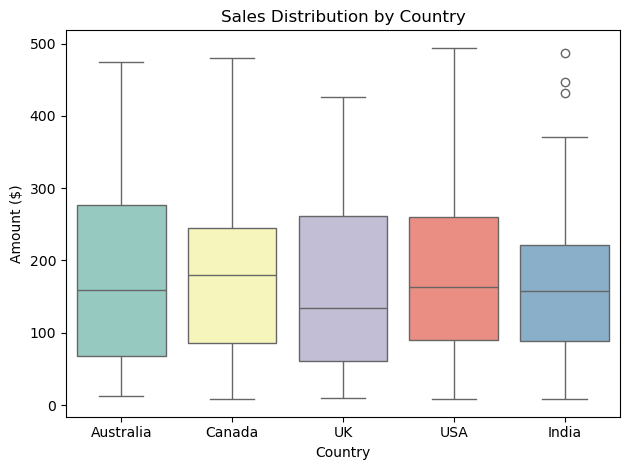

In [27]:
#Sales Distribution by Country
sns.boxplot(x="Country", y="Amount ($)", data=df, hue="Country",palette="Set3")
plt.title("Sales Distribution by Country")
plt.tight_layout()
plt.show()

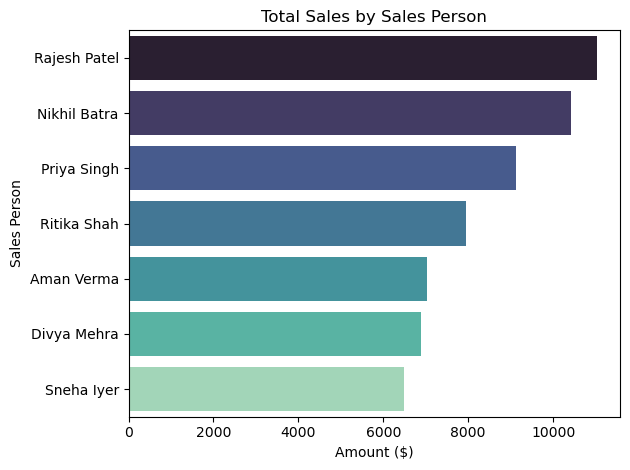

In [28]:
#Top Sales Person Performance
sns.barplot(x=top_sales.values, y=top_sales.index, hue = top_sales.index,palette="mako")
plt.title("Total Sales by Sales Person")
plt.xlabel("Amount ($)")
plt.ylabel("Sales Person")
plt.tight_layout()
plt.show()

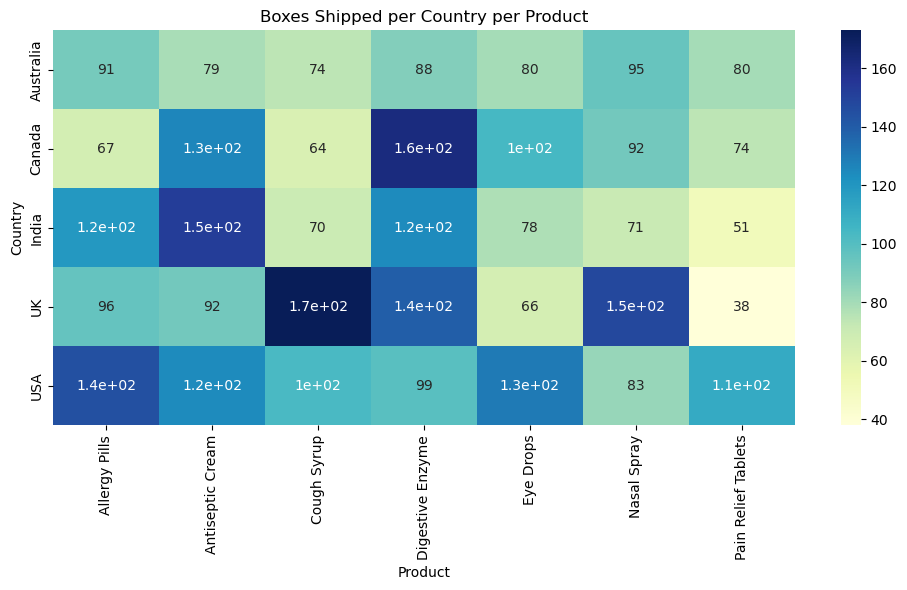

In [132]:
#Heatmap: Boxes Shipped vs Country vs Product

pivot_table = df.pivot_table(values="Boxes Shipped", index="Country", columns="Product", aggfunc="sum", fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Boxes Shipped per Country per Product")
plt.tight_layout()
plt.show()

In [29]:
#avreage per box
product_stats = df.groupby("Product")[["Amount ($)", "Boxes Shipped"]].sum()

product_stats["Avg Revenue per Box"] = product_stats["Amount ($)"] / product_stats["Boxes Shipped"]

print(product_stats[["Avg Revenue per Box"]].sort_values(by="Avg Revenue per Box", ascending=False))


                     Avg Revenue per Box
Product                                 
Digestive Enzyme               18.066356
Eye Drops                      17.546638
Nasal Spray                    17.192965
Antiseptic Cream               16.991763
Pain Relief Tablets            16.929633
Cough Syrup                    16.357459
Allergy Pills                  15.024286


In [30]:
#most Sold 
df = pd.read_csv("pharmacy_otc_sales_data.csv")

country_product = df.groupby(["Country", "Product"])["Boxes Shipped"].sum().reset_index()

most_sold = country_product.sort_values('Boxes Shipped', ascending=False).groupby("Country").first()

print(most_sold)


                    Product  Boxes Shipped
Country                                   
Australia       Nasal Spray             95
Canada     Digestive Enzyme            162
India      Antiseptic Cream            152
UK              Cough Syrup            173
USA           Allergy Pills            145
